## Tarea 5.7

En ausencia de una señal, un cierto detector de partículas en promedio detecta  2  impactos por segundo debidos a una contaminación de fondo. Durante una medición se obtienen las siguientes observaciones (esta es una lista del número de señales por cada segundo de duración del experimento):

In [1]:
mediciones = [2, 3, 3, 3, 0, 1, 2, 2, 0, 4, 10, 0, 2, 4, 6, 3, 2, 1, 1, 1]

Compare estos resultados con la distribución de Poisson. Discuta en cuáles intervalos cree usted que se detectó una señal que no es contaminación.

## Solución.

Usando la distribución de Poisson, que se define como:


$$
P(n; \lambda) = \frac{\lambda^n}{n!} e^{-\lambda}
$$

Podemos definir nuestra función de la siguiente manera:


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math



def resultados_poisson(eventos, lamda): # Definimos nuestra función.
    '''
    Esta función calcula la distribución de Poisson para cualquier valor 
    de "eventos".
    
    Veremos más adelante que nos servirá para poder calcular la distribución
    de Poisson de los valores de la lista "mediciones".
    
    Los inputs son:
    
    eventos = el número de mediciones.
    lamda = el promedio de las mediciones.
    
    '''
    poisson = [] # Se define una lista para los valores
                 # de la distribución de Poisson.
  
    if type(eventos) == int: # Ponemos la condición de que si el "type"eventos es un entero,
                       # regresamos la distribución de Poisson.
        
        return (lamda**eventos)*np.exp(-lamda)/(math.factorial(eventos))
    else: 
        # Por otro lado, iniciamos un ciclo en donde agregamos
        # los términos de la distribución de Poisson a la lista "poisson".
        for i in eventos:
            poisson.append((lamda**i)*np.exp(-lamda)/(math.factorial(i)))
        return poisson   
        

Ejecutando el código

In [3]:
resultados_poisson(mediciones, 2)

[0.2706705664732254,
 0.1804470443154836,
 0.1804470443154836,
 0.1804470443154836,
 0.1353352832366127,
 0.2706705664732254,
 0.2706705664732254,
 0.2706705664732254,
 0.1353352832366127,
 0.0902235221577418,
 3.8189850648779595e-05,
 0.1353352832366127,
 0.2706705664732254,
 0.0902235221577418,
 0.012029802954365574,
 0.1804470443154836,
 0.2706705664732254,
 0.2706705664732254,
 0.2706705664732254,
 0.2706705664732254]

Vemos que el número 10 es un numero que dista mucho de los valores de la lista, por lo cual creeemos que es la señal que no detecto 
contaminación. Pero aun no hemos terminado de hacer el análisis.

Podemos hacer un análisis más detallado de la situación que se nos presenta.

Text(0, 0.5, 'Probabilidad')

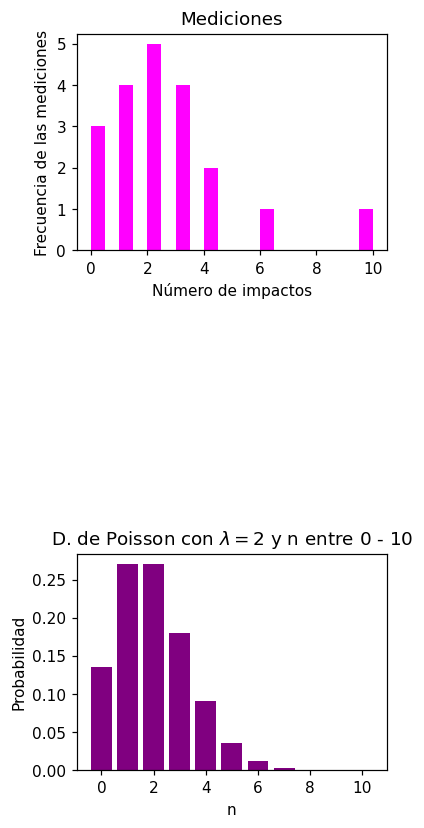

In [28]:
def probs(lamda, l):
    return [resultados_poisson(eventos, lamda) for eventos in range(l+1)] 

# Definimos una función de comprensión de listas que me define una lista con los
# elementos que me va a generar la función resultados_poisson.

fig = plt.figure(figsize=(8,12), dpi= 110)


ax1= fig.add_subplot(4,2,1) #gráfico 1
ax1.hist(mediciones, bins= 20, color = "magenta")
ax1.set_title('Mediciones')
ax1.set_xlabel('Número de impactos')
ax1.set_ylabel('Frecuencia de las mediciones')

ax2 = fig.add_subplot(4,2,5) #gráfico 2
ax2.bar(range(10+1), probs(2, 10),color= 'purple')
ax2.set_title('D. de Poisson con $\lambda = 2$ y n entre 0 - 10')
ax2.set_xlabel('n')
ax2.set_ylabel('Probabilidad')

# Acá lo que se hace es definir una serie de gráficos para la lista de mediciones y la frecuencia
# de cada medición. El otro gráfico es de la distribución de poisson de la lista de mediciones con sus
# respectiva probabilidad, que llega hasta el 25%.



Acá vemos de manera más clara que el porcentaje de que ocurra 10 es bastante mas difusa que las anteriores. Por lo que ahora podemos decir que en la señal 10
no se detecto contaminación.